<b> This code is designed to analysis regionally-averaged and DJF-averaged precipitiaton and temperature from observations, HAD historical, MPI historical, HAD future, and MPI future. The data used is for the ELI.</b> 

<b> From this code we will determine particular ENSO events to analyze with and create composites with. The current data is from: Observations, MPI, and HAD</b>

In [1]:
import numpy as np  
from sklearn.linear_model import LinearRegression
import xarray as xr
from metpy.constants import g, omega as om, Re as a
from metpy.units import units

# import for plots
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

import metpy.calc as mpcalc
from metpy.units import units
from netCDF4 import num2date
import pandas as pd

# Latitude and Longitude of Focus
# (33˙N - 43˙N) and (130˙W – 114˙N) 
# West: 230,246

<b> Upload Historical Data for the observations, MPI, and HAD </b> 

In [2]:
# Upload ELI data for MPI - Historical
dir = '/chinook/dallmann/MPI_SST/'
fn_MPI_his = 'ELI_MPI_1950-2014.nc'

data_mpi_his = xr.open_dataset(dir+fn_MPI_his)

In [3]:
# Arrange the MPI data into DJF

eli_mpi_DJF_his = data_mpi_his.where(data_mpi_his['time.season'] == 'DJF',drop = True)

eli_mpi_DJF_his['eli'].values

nyears =  65

eli_djf_mpi_his= np.zeros((nyears))

counter = 0 
for jj in range (0,nyears,1): 
    eli_djf_mpi_his[jj] = eli_mpi_DJF_his['eli'][counter:counter+3].mean()
    counter = counter + 3
    
eli_djf_mpi_his

array([160.29656649, 159.55479988, 165.84269599, 165.02325027,
       164.34197694, 174.98717892, 169.98756442, 162.47868277,
       158.01484408, 160.12649079, 171.0381994 , 167.01675957,
       160.13143727, 162.86821266, 164.33712395, 167.28469251,
       162.81173247, 155.59395068, 164.11947063, 164.43545784,
       161.47237414, 166.4131382 , 166.16410233, 162.20945989,
       165.10223138, 167.55962446, 162.69507584, 158.63993457,
       159.6669481 , 167.33385641, 170.35695045, 168.43907655,
       171.81454524, 170.83922221, 166.05252689, 161.47192243,
       161.92618735, 156.80737426, 161.97736012, 164.28792664,
       171.65892621, 162.49400029, 165.57158632, 177.38178243,
       172.93429777, 165.78198291, 159.14665628, 159.65906984,
       163.40446257, 165.57977788, 161.18771505, 166.33492981,
       164.54461499, 161.36544238, 160.72245137, 168.322077  ,
       168.55526114, 161.7727766 , 164.4038671 , 165.07421056,
       170.03322587, 172.91115102, 166.11769045, 167.50

In [4]:
# Upload ELI data for HAD - Historical
dir = '/chinook/dallmann/HAD_SST/'
fn_HAD_his = 'ELI_HAD_1950-2014.nc'

data_had_his = xr.open_dataset(dir+fn_HAD_his)

In [5]:
# Arrange the HAD data into DJF

eli_had_DJF_his = data_had_his.where(data_had_his['time.season'] == 'DJF',drop = True)

eli_had_DJF_his['eli'].values

#nyears =  65

#eli_djf_had_his= np.zeros((nyears))

#counter = 0 
#for jj in range (0,nyears,1): 
    #eli_djf_had_his[jj] = eli_had_DJF_his['eli'][counter:counter+3].mean()

#eli_djf_had_his

#eli_had_DJF_his

# Try it out with the other method to seasonally mean the data

eli_djf_had_his = eli_had_DJF_his.rolling(min_periods=3, center=True, time=3).mean()
eli_djf_had_his = eli_had_DJF_his.groupby('time.year').mean('time')

eli_djf_had_his

<xarray.Dataset>
Dimensions:  (year: 65)
Coordinates:
  * year     (year) int64 1950 1951 1952 1953 1954 ... 2010 2011 2012 2013 2014
Data variables:
    eli      (year) float64 162.6 166.4 172.2 166.7 ... 170.8 188.5 170.8 161.9

In [6]:
# Upload Observational data for SSTs - Historical
dir = '/chinook/dallmann/SST/'
fn_ob = 'ELI_ERSSTv5_1854.01-2020.05.nc'

data_ob = xr.open_dataset(dir+fn_ob)

In [7]:
# Arrange the data into DJF

eli_ob_DJF = data_ob.where(data_ob['time.season'] == 'DJF',drop = True)

eli_ob_DJF['nino'].values

nyears =  65

eli_djf_ob= np.zeros((nyears))

counter = 0 
for jj in range (0,nyears,1): 
    eli_djf_ob[jj] = eli_ob_DJF['nino'][counter:counter+3].mean()
    counter = counter + 3
    
eli_djf_ob

array([157.77000427, 162.32667542, 160.09667969, 156.30665588,
       163.29333496, 158.84333801, 155.75      , 164.55665588,
       155.93666077, 170.86000061, 163.29333496, 156.40667725,
       168.39334106, 157.32666016, 164.25999451, 162.48332214,
       160.43998718, 157.89665222, 156.86000061, 156.7766571 ,
       157.91667175, 156.04333496, 157.92668152, 168.59332275,
       183.83666992, 157.02000427, 164.92999268, 162.90667725,
       158.24000549, 159.58666992, 166.8066864 , 164.07000732,
       158.68333435, 155.3999939 , 165.90000916, 169.06333923,
       155.59666443, 161.87666321, 155.96000671, 155.20666504,
       155.66334534, 165.46998596, 164.09999084, 164.00999451,
       157.22000122, 157.75665283, 168.91999817, 160.19332886,
       164.09999084, 167.12666321, 159.16667175, 168.57666016,
       161.92333984, 157.46000671, 159.69000244, 154.74998474,
       153.06666565, 159.65333557, 171.58332825, 161.13667297,
       166.60333252, 164.69999695, 149.43666077, 146.47

<b> Upload mean precipitation data from Chinook </b> 

In [8]:
#Upload MPI DJF mean prcipitaiton data from the chinook directory
dir = '/chinook/dallmann/MPI/precip/'
fn_mpip = 'pr_MPI_1950-2014_DJFmean.nc'

data_mpi_pr_his = xr.open_dataset(dir+fn_mpip)

# Parse using MetPy, this allows us to use MetPy operations on it
data_mpi_pr_his = data_mpi_pr_his.metpy.parse_cf()

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


In [22]:
# Upload HAD DJF mean precipiation data from the chinook directory

dir = '/chinook/dallmann/HAD/precip/'
fn_hadp = 'HAD_precip_1950-2014_DJFmean.nc'


data_had_pr_his = xr.open_dataset(dir+fn_hadp)

# Parse using MetPy, so we can use MetPy operations with it
data_had_pr_his = data_had_pr_his.metpy.parse_cf()

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


In [10]:
# Upload Observational DJF mean precipitiaon data from the chinook directory
dir = '/chinook/dallmann/Ob_data/Ob_data/'
fn_obp = 'precip.V1.0.mon.meanDJF.nc'

data_ob_pr = xr.open_dataset(dir+fn_obp)

# Parse using MetPy, this allows us to use MetPy operations on it
data_ob_pr = data_ob_pr.metpy.parse_cf()

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


In [11]:
# Adjust the time series for the HAD

data_had_pm_his_new = data_had_pr_his
data_had_pm_his_new['time'] = data_had_pr_his.indexes['time'].to_datetimeindex(unsafe=True)

#data_had_pm_his_new['time']

In [19]:
# Assign Variables for Time and Precipiation

#MPI-his
time_mpi_pr_his = data_mpi_pr_his['time']
lat_mpi_pr_his = data_mpi_pr_his['lat']
lon_mpi_pr_his = data_mpi_pr_his['lon']
pr_mpi_his = data_mpi_pr_his['pr']

#HAD-his
time_had_pr_his = data_had_pr_his['time']
lat_had_pr_his = data_had_pr_his['lat']
lon_had_pr_his = data_had_pr_his['lon']
pr_had_his = data_had_pr_his['pr']

#Observations
time_ob_pr = data_ob_pr['time']
lat_ob_pr = data_ob_pr['lat']
lon_ob_pr = data_ob_pr['lon']
pr_ob = data_ob_pr['precip']

In [13]:
# Calculate the precipitation in mm/month

pr_mpi_unit_his = pr_mpi_his*86400*31
pr_had_unit_his = pr_had_his*86400*31
pr_ob_unit = pr_ob*31

In [14]:
#Plot
pr_mpi_plot_his = pr_mpi_unit_his.sel(lat=slice(33, 43), lon=slice(230,246)).mean(dim=['lat','lon'])
pr_had_plot_his = pr_had_unit_his.sel(lat=slice(33, 43), lon=slice(230,246)).mean(dim=['lat','lon'])
pr_ob_plot = pr_ob_unit.sel(lat=slice(33, 43), lon=slice(230,246)).mean(dim=['lat','lon'])

# Must remove a variable since the dimensions of Precip is too large
# I removed the "0" variable 
pr_mpi_plot_his_removed = np.delete(pr_mpi_plot_his, 0)
pr_had_plot_his_removed = np.delete(pr_had_plot_his, 0)
pr_ob_plot_removed = np.delete(pr_ob_plot,[0, 1, 65, 66, 67])

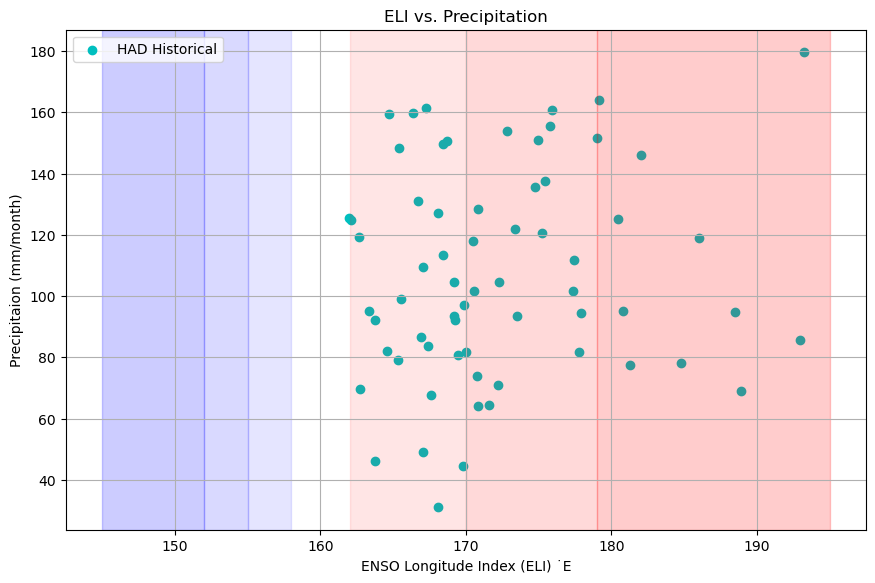

In [17]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax=fig.add_axes([0,0,1,1])
#ax.scatter(eli_djf_mpi_his, pr_mpi_plot_his_removed, marker='o', color='b', label= 'MPI Historical')
ax.scatter(eli_djf_had_his['eli'], pr_had_plot_his_removed, marker='o', color='c', label= 'HAD Historical')
#ax.scatter(eli_djf_ob, pr_ob_plot_removed, color='r', label= 'Observations')

#ax.scatter(eli_djf_mpi_sim, pr_mpi_plot_sim, marker='s', color='c', label= 'MPI Future')

ax.set_xlabel('ENSO Longitude Index (ELI) ˙E')
ax.set_ylabel('Precipitaion (mm/month)')
ax.set_title('ELI vs. Precipitation')
ax.legend(loc="upper left")
plt.grid(True)

# El NIno
ax.axvspan(179,195, alpha=0.2, color='red')
ax.axvspan(170,179, alpha=0.15, color='red')
ax.axvspan(162,170, alpha=0.1, color='red')

# La Nina
ax.axvspan(155,158, alpha=0.1, color='blue')
ax.axvspan(152,155, alpha=0.15, color='blue')
ax.axvspan(145, 152, alpha=0.2, color='blue')

# Linear Regression Lines 
#m, b = np.polyfit(eli_djf_mpi_his, pr_mpi_plot_his_removed, 1)
#plt.plot(eli_djf_mpi_his, m*eli_djf_mpi_his + b)

#m, b = np.polyfit(eli_djf_mpi_sim, pr_mpi_plot_sim, 1)
#plot(eli_djf_mpi_sim, m*eli_djf_mpi_sim + b)

plt.show()